In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython
import IPython.display
import math 

In [100]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [101]:
data = pd.read_csv("data_P3.csv")
date_time = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour']])
data = data.drop(columns = ["Unnamed: 0",'time','date','Year','Month','Day','Hour'])
data.head()


,tempC,windspeedKmph,winddirDegree,precipMM,humidity,visibility,pressure,cloudcover,DewPointC,WindGustKmph,...,NOx_t1,NOx_t2,SO2_t1,SO2_t2,Coal,Petroleum,Coke,Natural gas,Electricity,Accident Count
0,7,14,10,0.0,35,10,1020,0,-8,30,...,34.4,17.5,0.5,0.7,57,7,8,73779,14716,137
1,7,14,17,0.0,34,10,1020,1,-8,30,...,34.6,20.8,0.6,0.7,57,7,8,73779,14716,137
2,7,14,25,0.0,34,10,1020,1,-8,30,...,33.7,21.9,0.2,0.7,57,7,8,73779,14716,137
3,6,14,32,0.0,34,10,1020,2,-8,30,...,32.1,14.5,0.2,0.5,57,7,8,73779,14716,137
4,6,15,24,0.0,34,10,1020,2,-9,30,...,31.5,12.8,0.1,0.5,57,7,8,73779,14716,137


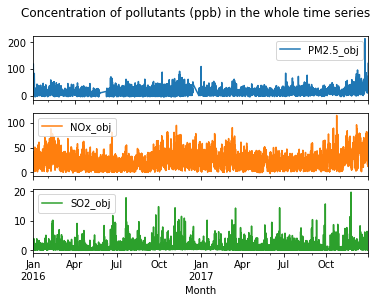

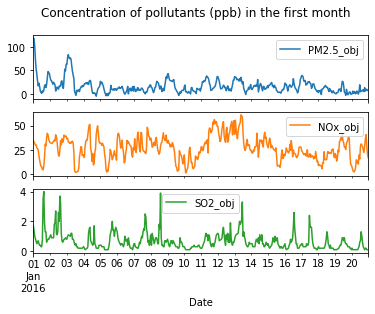

In [102]:
plot_cols = ['PM2.5_obj', 'NOx_obj', 'SO2_obj']
plot_features = data[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True, xlabel = "Month", title = "Concentration of pollutants (ppb) in the whole time series")
plt.savefig("Pollutants_whole.png",dpi = 800)

plot_features = data[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True, xlabel = "Date", title = "Concentration of pollutants (ppb) in the first month")
plt.savefig("Pollutants_month.png",dpi = 800)


In [103]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tempC,17544.0,19.928694,6.017436,5.00,15.000000,20.000000,24.000000,41.000
windspeedKmph,17544.0,7.687415,4.690475,0.00,4.000000,7.000000,10.000000,42.000
winddirDegree,17544.0,188.466655,76.870087,0.00,144.000000,208.000000,239.000000,360.000
precipMM,17544.0,0.049920,0.460229,0.00,0.000000,0.000000,0.000000,17.700
humidity,17544.0,57.029925,21.308192,9.00,41.000000,58.000000,74.000000,98.000
visibility,17544.0,9.774624,1.057727,0.00,10.000000,10.000000,10.000000,10.000
pressure,17544.0,1015.356304,4.022352,996.00,1012.000000,1015.000000,1018.000000,1034.000
cloudcover,17544.0,15.026676,23.316564,0.00,0.000000,4.000000,19.000000,100.000
DewPointC,17544.0,9.840743,6.371335,-15.00,6.000000,11.000000,15.000000,22.000
WindGustKmph,17544.0,10.677326,6.727861,0.00,6.000000,9.000000,14.000000,83.000


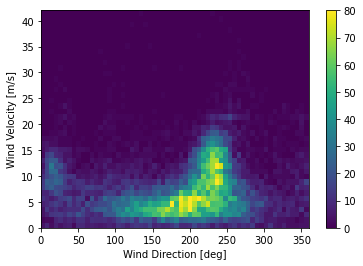

In [104]:
plt.hist2d(data['winddirDegree'], data["windspeedKmph"], bins=(60, 40), vmax=80)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')
plt.savefig("Wind_before.png",dpi = 800)

In [105]:
wv = data.pop("windspeedKmph")

# Convert to radians.
wd_rad = data.pop('winddirDegree')*np.pi / 180

# Calculate the wind x and y components.
data['Wx'] = wv*np.cos(wd_rad)
data['Wy'] = wv*np.sin(wd_rad)

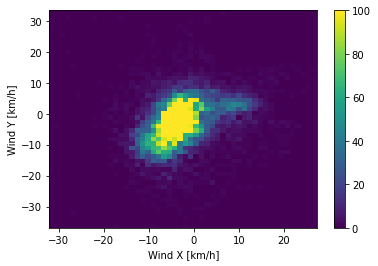

In [106]:
plt.hist2d(data['Wx'], data['Wy'], bins=(50, 50), vmax=100)
plt.colorbar()
plt.xlabel('Wind X [km/h]')
plt.ylabel('Wind Y [km/h]')
ax = plt.gca()
ax.axis('tight')
plt.savefig("Wind_after.png",dpi=800)

In [107]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [108]:
day = 24*60*60
year = (365.2425)*day

data['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
data['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
data['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
data['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

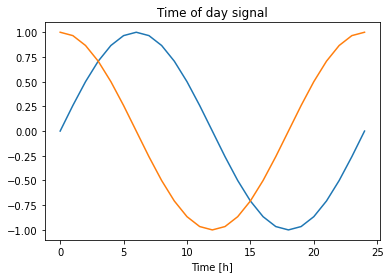

In [109]:
plt.plot(np.array(data['Day sin'])[:25])
plt.plot(np.array(data['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.savefig("Time_of_Day.png",dpi = 800)

In [110]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_data = data[0:int(n*0.7)]
val_data = data[int(n*0.7):int(n*0.9)]
test_data = data[int(n*0.9):]

num_features = data.shape[1]

In [111]:
train_mean = train_data.mean()
train_std = train_data.std()

train_data = (train_data - train_mean) / train_std
val_data = (val_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

def eval(A):
    return A/2

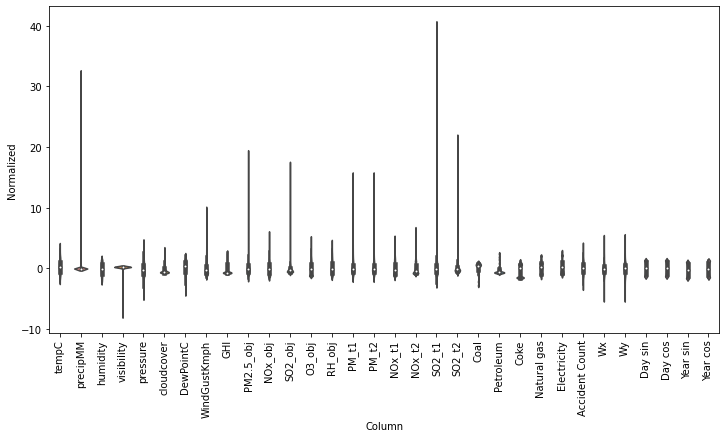

In [112]:
data_std = (data - train_mean) / train_std
data_std = data_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=data_std)
_ = ax.set_xticklabels(data.keys(), rotation=90)
plt.savefig("Normalized_Data")

In [15]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
        train_data=train_data, val_data=val_data, test_data=test_data,
        label_columns=None):
        # Store the raw data.
        self.train_data = train_data
        self.val_data = val_data
        self.test_data = test_data

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
          self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_data.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
             labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                    axis=-1)

      # Slicing doesn't preserve static shape information, so set the shapes
      # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        return inputs, labels
    
    def plot(self, model=None, plot_col="PM2.5_obj", max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                  label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                  label_col_index = plot_col_index

            if label_col_index is None:
                  continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                      marker='X', edgecolors='k', label='Predictions',
                      c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
                  data=data,
                  targets=None,
                  sequence_length=self.total_window_size,
                  sequence_stride=1,
                  shuffle=True,
                  batch_size=32,)

        ds = ds.map(self.split_window)

        return ds

In [16]:
@property
def train(self):
    return self.make_dataset(self.train_data)

@property
def val(self):
    return self.make_dataset(self.val_data)

@property
def test(self):
    return self.make_dataset(self.test_data)

@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [17]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=3):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [18]:
wide_window1 = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=["PM2.5_obj"])

wide_window2 = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=["SO2_obj"])

wide_window3 = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=["NOx_obj"])

In [19]:
lstm_model1 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])
lstm_model2 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])
lstm_model3 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [20]:
history1 = compile_and_fit(lstm_model1, wide_window1)

IPython.display.clear_output()
val_performance1 = lstm_model1.evaluate(wide_window1.val)
performance1 = lstm_model1.evaluate(wide_window1.test, verbose=0)

109/109 [==============================] - 0s 4ms/step - loss: 0.4822 - mean_absolute_error: 0.5234


In [21]:
history2 = compile_and_fit(lstm_model2, wide_window2)

IPython.display.clear_output()
val_performance2 = lstm_model2.evaluate(wide_window2.val)
performance2 = lstm_model2.evaluate(wide_window2.test, verbose=0)

109/109 [==============================] - 0s 3ms/step - loss: 0.4981 - mean_absolute_error: 0.3942


In [22]:
history3 = compile_and_fit(lstm_model3, wide_window3)

IPython.display.clear_output()
val_performance3 = lstm_model3.evaluate(wide_window3.val)
performance3 = lstm_model3.evaluate(wide_window3.test, verbose=0)

109/109 [==============================] - 1s 4ms/step - loss: 0.1400 - mean_absolute_error: 0.2761


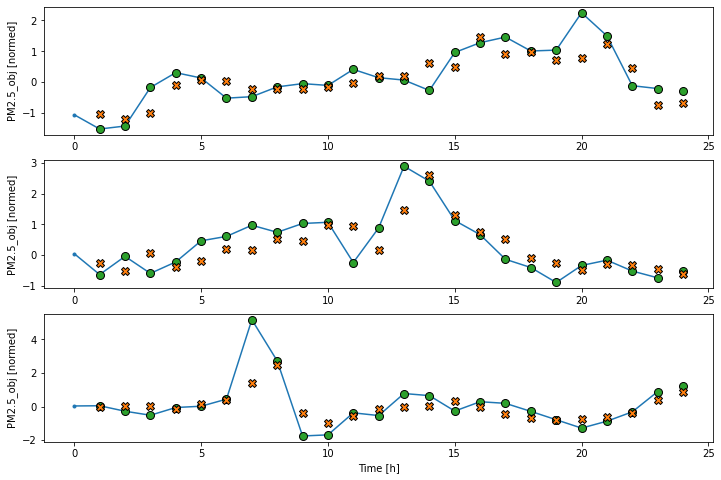

In [81]:
wide_window1.plot(lstm_model1,"PM2.5_obj")
plt.savefig("P3_PM_LSTM.png", dpi = 800)

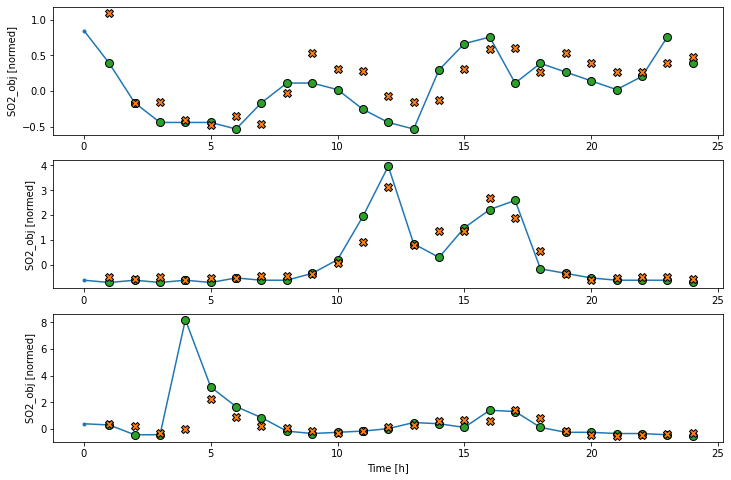

In [82]:
wide_window2.plot(lstm_model2,"SO2_obj")
plt.savefig("P3_SO2_LSTM.png", dpi = 800)

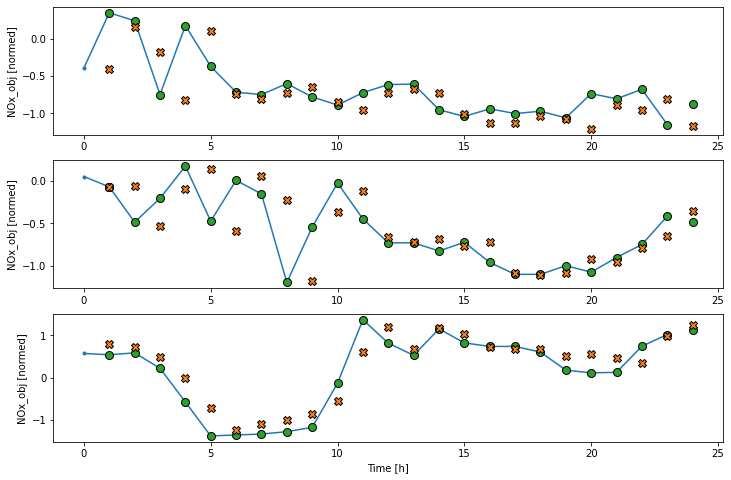

In [83]:
wide_window3.plot(lstm_model3,"NOx_obj")
plt.savefig("P3_NOx_LSTM.png", dpi = 800)

In [74]:
GRU_model1 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, GRU_units]
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.GRU(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])
GRU_model2 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, GRU_units]
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.GRU(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])
GRU_model3 = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, GRU_units]
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.Dense(units=16, activation = 'relu'),
    tf.keras.layers.GRU(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [75]:
history4 = compile_and_fit(GRU_model1, wide_window1)

IPython.display.clear_output()
val_performance4 = GRU_model1.evaluate(wide_window1.val)
performance4 = GRU_model1.evaluate(wide_window1.test, verbose=0)

109/109 [==============================] - 1s 5ms/step - loss: 0.4529 - mean_absolute_error: 0.4961


In [76]:
history5 = compile_and_fit(GRU_model2, wide_window2)

IPython.display.clear_output()
val_performance5 = GRU_model2.evaluate(wide_window2.val)
performance5 = GRU_model2.evaluate(wide_window2.test, verbose=0)

109/109 [==============================] - 1s 7ms/step - loss: 0.5778 - mean_absolute_error: 0.4794


In [77]:
history6 = compile_and_fit(GRU_model3, wide_window3)

IPython.display.clear_output()
val_performance6 = GRU_model3.evaluate(wide_window3.val)
performance6 = GRU_model3.evaluate(wide_window3.test, verbose=0)

109/109 [==============================] - 0s 3ms/step - loss: 0.1441 - mean_absolute_error: 0.2714


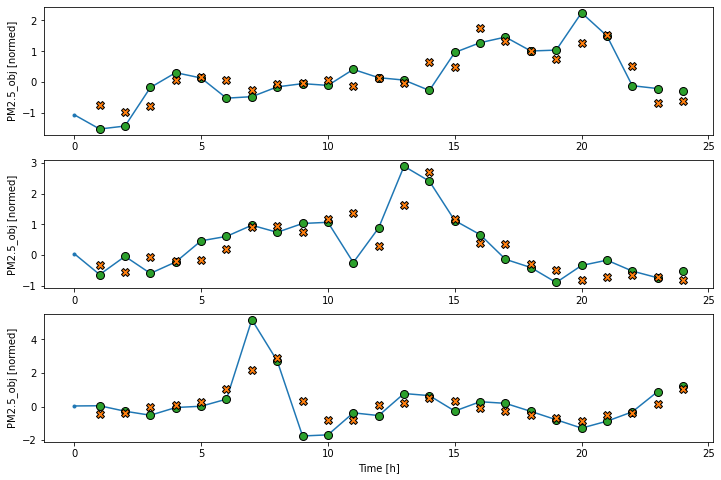

In [78]:
wide_window1.plot(GRU_model1,"PM2.5_obj")
plt.savefig("P3_PM_GRU.png", dpi = 800)


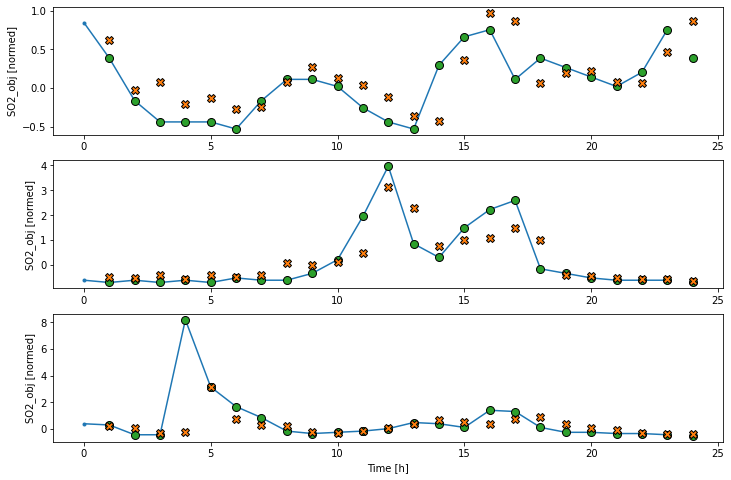

In [79]:
wide_window2.plot(GRU_model2,"SO2_obj")
plt.savefig("P3_SO2_GRU.png", dpi = 800)

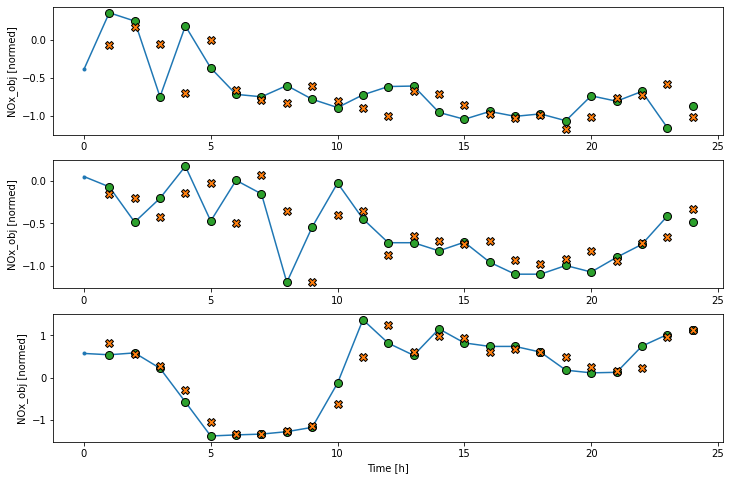

In [80]:
wide_window3.plot(GRU_model3,"NOx_obj")
plt.savefig("P3_NOx_GRU.png", dpi = 800)

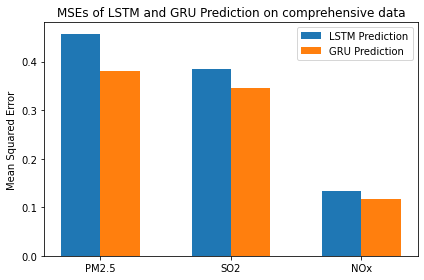

In [113]:
labels=["PM2.5","SO2","NOx"]
lstm_perfrom = [eval(performance1[0]),eval(performance2[0]),eval(performance3[0])]
gru_perfrom = [eval(performance4[0]),eval(performance5[0]),eval(performance6[0])]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lstm_perfrom, width, label='LSTM Prediction')
rects2 = ax.bar(x + width/2, gru_perfrom, width, label='GRU Prediction')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Squared Error')
ax.set_title('MSEs of LSTM and GRU Prediction on comprehensive data')
plt.xticks(x,labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig("MSEs of LSTM and GRU Prediction on comprehensive data.png",dpi=800)

plt.show()

In [48]:
LSTM_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24, 16)            528       
                                                                 
 dense_13 (Dense)            (None, 24, 16)            272       
                                                                 
 dense_14 (Dense)            (None, 24, 16)            272       
                                                                 
 lstm_3 (LSTM)               (None, 24, 32)            6272      
                                                                 
 dense_15 (Dense)            (None, 24, 1)             33        
                                                                 
Total params: 7,377
Trainable params: 7,377
Non-trainable params: 0
_________________________________________________________________
